# Import

In [1]:
!pwd
!python --version
!which python

/home/shpaik/21-aaai2022v2/Fig2/Sensitivity_gamma
Python 3.6.10 :: Anaconda, Inc.
/home/shpaik/anaconda3/envs/py36/bin/python


In [2]:
import os
current_dir = os.getcwd()
print(current_dir)

# control the maximum number of threads that numpy uses by 8
os.environ["OMP_NUM_THREADS"] = "8" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "8" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "8" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "8" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "8" # export NUMEXPR_NUM_THREADS=6

/home/shpaik/21-aaai2022v2/Fig2/Sensitivity_gamma


In [3]:
os.chdir("../../")
from lib_external.SCLUB import SCLUB
from lib_external.DyClu import DyClu
os.chdir(current_dir)

%run SYNTH_functions.ipynb

In [4]:
my_data = "SYNTH"

we_need_tuning = True # True: tuning will be inclued / False : use already tuned paramter

TUNED_V_LAM = {
    'Random': {'v': 0, 'lam': 0},
    'RGraphTS': {'v': 0, 'lam': 0},
    'LinTS': {'v': 0, 'lam': 0},
    'SemiRGraphTS': {'v': 0, 'lam': 0},
    'GraphUCBlocal': {'v': 0, 'lam': 0},
    'CLUB': {'v': 0, 'lam': 0},    
    'IndividualSemiRidgeGraphThompson': {'v': 0, 'lam': 0},
    'LinTS_Single': {'v': 0, 'lam': 0},
    'SemiTS_Single': {'v': 0, 'lam': 0},
    'SCLUB': {'v': 0, 'lam': 0},
    'DyClu': {'v': 0, 'lam': 0}
}

In [5]:
import numpy as np 
import networkx as nx
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import Normalizer, MinMaxScaler
from scipy.sparse import csgraph 
import scipy
import os
import random
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import time
from datetime import datetime

In [6]:
plt.style.use("ggplot")

[]

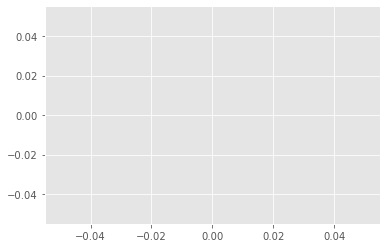

In [7]:
plt.figure()
plt.plot()

In [13]:
simul_n=5

# fix n, N, d
user_num = 30
arm_num = 10
dimension = 40

# change gamma
# gamma = 5

time_horizon = 50000
tuning_time_horizon = 5000

nu_type = "1" # nonstationary
arm_type = "sparse"
our_graph_type = "ER"

IMG_FOLDER = "results/" + "gamma_"+str(gamma) +"/arm="+arm_type +"_nu="+ nu_type +"_g="+our_graph_type
IMG_FOLDER_FOR_OS = current_dir+"/"+IMG_FOLDER

## Other settings

In [14]:
print("--------------------")
tuning_simul_n = 1

const_R = 0.1
delta = 0.05

################################## v_set and lam_set ##################################
v_set=[0.001, 0.01, 0.1, 0.5, 1.]
lam_set=[0.01, 0.1, 0.5, 1., 5]

v_num = len(v_set); lam_num = len(lam_set)
v_and_lam_num = v_num * lam_num

epsilon = 1
threshold = 0.5
prob = 0.4

lap_type = "random_walk"

##### For DyClu (default option) ####
dyclu_options = {
    'tau_e': 20, # size of sliding window,
    'alpha': 0.3,
    'delta_1': 1e-1,
    'delta_2': 1e-1,
    'change_detection_alpha': 0.01,
    'neighbor_identification_alpha': 0.01 ,
    'dataSharing': False, 
    'aggregationMethod': 'combine',
    'useOutdated': True ,
    'maxNumOutdatedModels': None, 
}

##### obsolete #####
const_alpha_2 = 0.15
const_tol_1 = dimension # * 10
const_tol_2 = const_tol_1 * 1e-5 
print(f"to1_1: {const_tol_1}, to1_2: {const_tol_2},")

--------------------
to1_1: 40, to1_2: 0.0004,


## Graph & Laplacian

In [15]:
our_graph, our_laplacian, users_features, symm_laplacian = set_graph_and_lapl_for_experiment(user_num, dimension, prob, threshold, our_graph_type, lap_type, gamma)

## Tuning

In [16]:
selected_models=["SCLUB", "DyClu"]

In [17]:
if we_need_tuning == True:
        Labels, results = tuning_v_and_lam_for_SELECTED_algo_SYNTH(selected_models,\
                                                                   v_set, lam_set, user_num, arm_num, dimension, tuning_time_horizon, const_R, delta, tuning_simul_n, epsilon, threshold, prob, gamma, our_graph, our_laplacian, symm_laplacian, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type)
else:
    print("No tuning.")

<set models>
RidgeTS, time = 0.001924753189086914 sec
IndTS, time = 0.0008449554443359375 sec
SCLUB, time = 0.0013828277587890625 sec
CLUB, time = 0.0016872882843017578 sec
DyClu, time = 0.00019979476928710938 sec
SemiRidegeTS, time = 0.0011086463928222656 sec
GUCBlocal, time = 0.0017969608306884766 sec
IndividualSemiRidgeGraphThompson, time = 0.0007319450378417969 sec
LinTS_Single, time = 8.916854858398438e-05 sec
SemiTS_Single, time = 7.796287536621094e-05 sec
(v= 0.001 lam= 0.01 ) 0 user: 5 / selected arms: 2 8 7 2 -1 2 2 4 8 4 2 5 / opt_arm: 7 / time : 0.019 sec
=====
iteration = 1/1, time = 1.086 sec
Random: 0.0193 ms
RGraphTS: 0.6774 ms
LinTS: 0.258 ms
SCLUB: 0.2998 ms
slot4: 0.0 ms
CLUB: 0.7818 ms
DyClu: 3.96 ms
SemiRGraphTS: 5.3293 ms
GraphUCBlocal: 0.5072 ms
IndividualSemiRidgeGraphThompson: 4.5888 ms
LinTS_Single: 0.2863 ms
SemiTS_Single: 4.6325 ms
TOTAL TIME: 1.086 sec
v=0.001 / lam=0.01
<set models>
RidgeTS, time = 0.0012693405151367188 sec
IndTS, time = 0.00065398216247558

## Choose best hyper parameters

Random


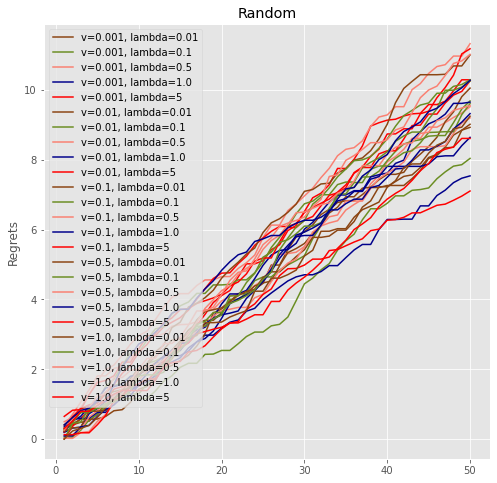

RGraphTS


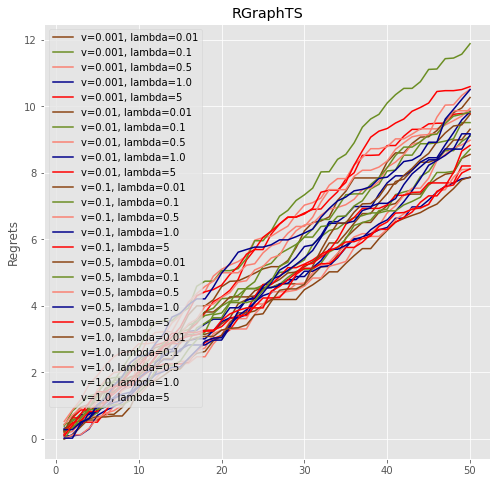

LinTS


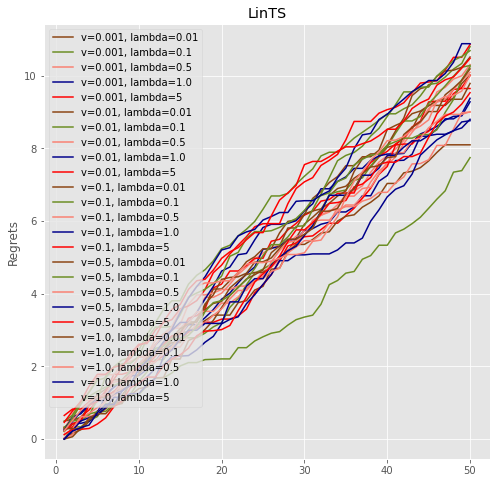

SemiRGraphTS


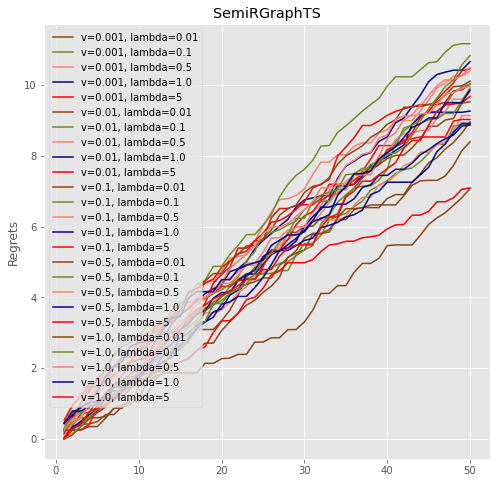

CLUB


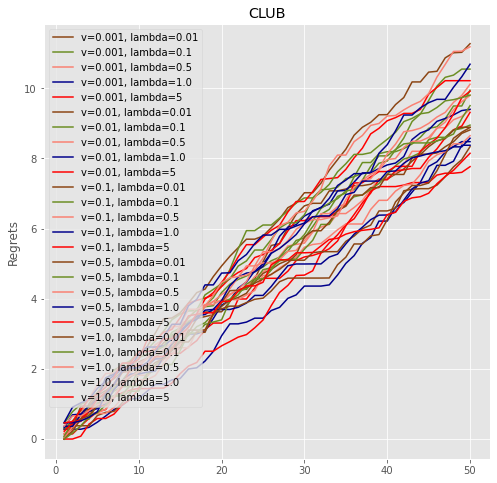

SCLUB


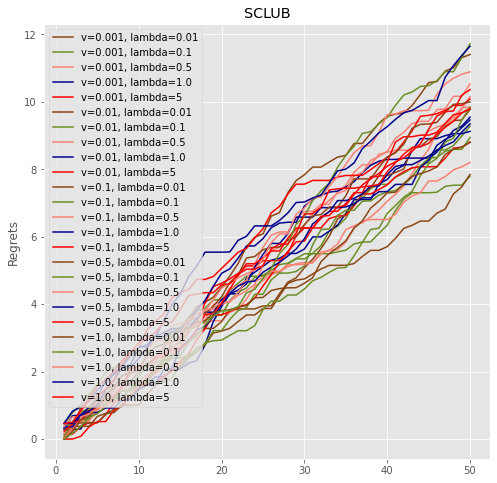

DyClu


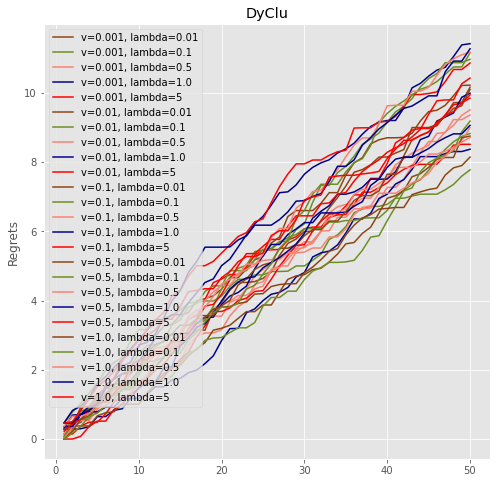

GraphUCBlocal


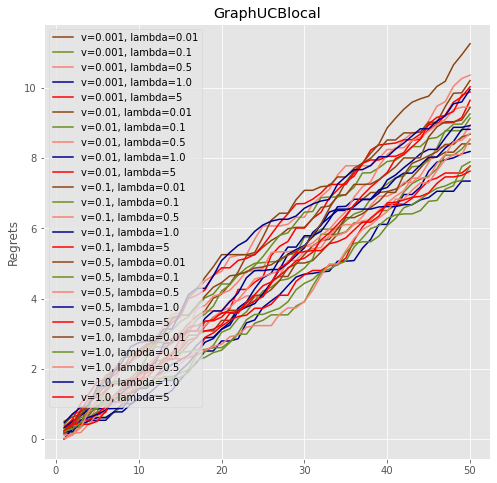

IndividualSemiRidgeGraphThompson


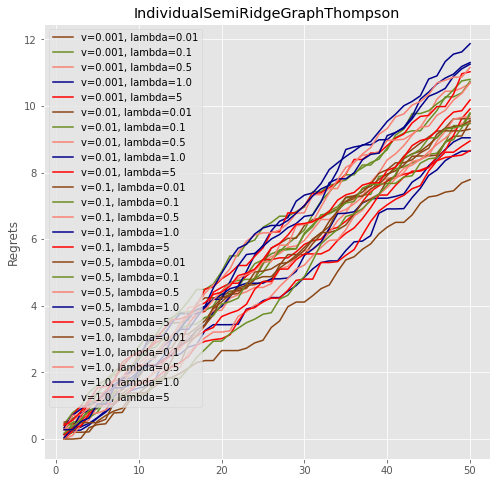

LinTS_Single


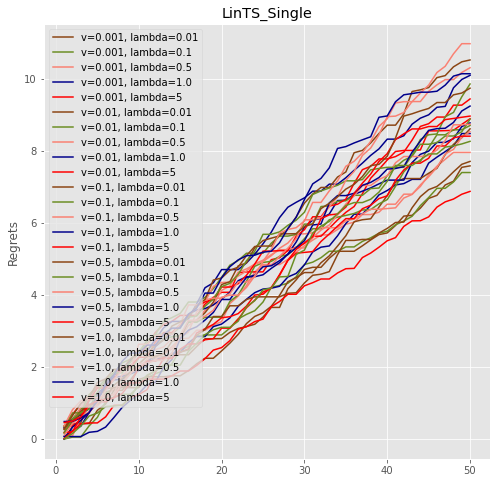

SemiTS_Single


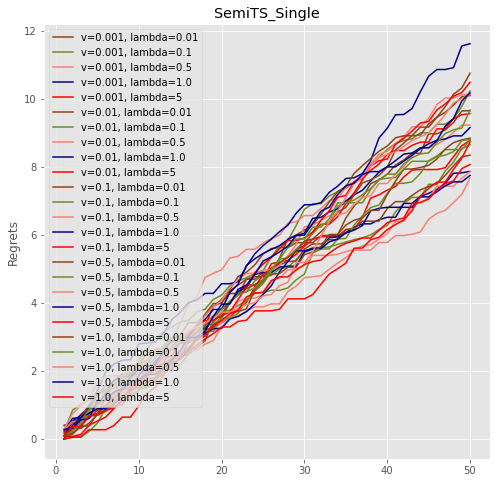

In [18]:
if we_need_tuning == True:
    algo_list = selected_models
    colors=["black", "darkred", "peru", "darkorange", "gold",
            "yellowgreen", "limegreen", "lightseagreen", "deepskyblue", "blue",
            "darkviolet", "magenta", "khaki", "plum", "grey",
            "steelblue", "lightcoral", "bisque", "darkolivegreen", "darkcyan",
            "saddlebrown", "olivedrab", "salmon", "darkblue", "red",
            "black", "darkred", "peru", "darkorange", "gold"]

    colors_by_lam = []
    temp = colors[20:20+lam_num]
    for i in range(v_num):
        colors_by_lam += temp

    colors_by_v = []
    for i in range(lam_num):
        temp = [colors[20+i] for j in range(v_num)]
        colors_by_v += temp

    RT_dict = {}
    for MODEL in algo_list:
        print(MODEL)
        #RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors, Labels, results)
        RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors_by_lam, Labels, results)
        #RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors_by_v, Labels, results)
else:
    print("No tuning.")

## Checkpoint: best tuning result of each algorithm

#n=30,arms=10,d=40,T=50,arm_type=sparse
Random: v= 1.0, lam = 5
RGraphTS: v= 0.01, lam = 1.0
LinTS: v= 0.001, lam = 0.1
SCLUB: v= 0.01, lam = 0.1
slot4: v= 1.1, lam = 1.1
CLUB: v= 0.001, lam = 5
DyClu: v= 0.001, lam = 0.1
SemiRGraphTS: v= 1.0, lam = 0.01
GraphUCBlocal: v= 0.5, lam = 1.0
IndividualSemiRidgeGraphThompson: v= 0.001, lam = 0.01
LinTS_Single: v= 1.0, lam = 5
SemiTS_Single: v= 0.01, lam = 0.5



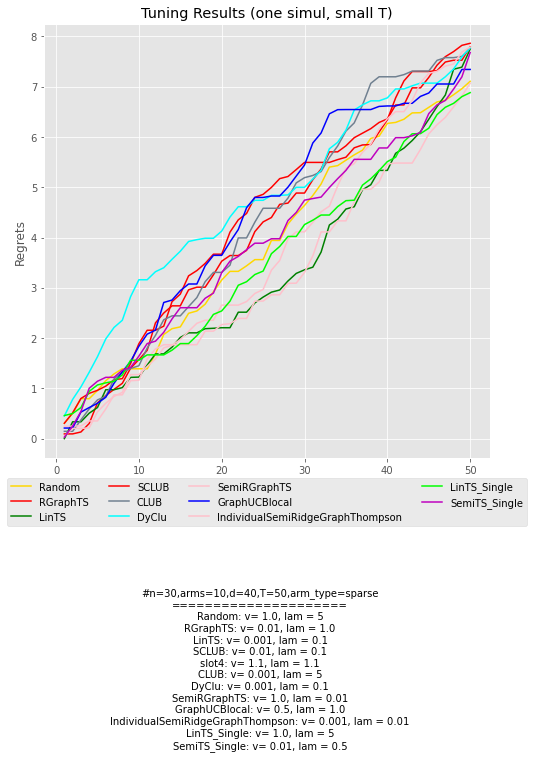

In [19]:
colors = ["gold", "r","g","r","k","slategrey","aqua","pink", "blue", "pink", "lime", "m"]
if we_need_tuning == True:
    best_v_lam_pair_dict, tuning_info = return_best_v_and_lambda_pair_real(selected_models, user_num, arm_num, dimension, tuning_time_horizon, arm_type, colors, results, RT_dict)
    # synthetic data also uses "return_best_..._pair_real"
else:
    print("No tuning.")
    best_v_lam_pair_dict = TUNED_V_LAM
    tuning_info = "No tuning.\n"+ str(TUNED_V_LAM).replace('}, ', '}\n')[1:-1]

In [20]:
print("we_need_tuning =", we_need_tuning)
best_v_lam_pair_dict

we_need_tuning = True


{'Random': {'v': 1.0, 'lam': 5},
 'RGraphTS': {'v': 0.01, 'lam': 1.0},
 'LinTS': {'v': 0.001, 'lam': 0.1},
 'SCLUB': {'v': 0.01, 'lam': 0.1},
 'slot4': {'v': 1.1, 'lam': 1.1},
 'CLUB': {'v': 0.001, 'lam': 5},
 'DyClu': {'v': 0.001, 'lam': 0.1},
 'SemiRGraphTS': {'v': 1.0, 'lam': 0.01},
 'GraphUCBlocal': {'v': 0.5, 'lam': 1.0},
 'IndividualSemiRidgeGraphThompson': {'v': 0.001, 'lam': 0.01},
 'LinTS_Single': {'v': 1.0, 'lam': 5},
 'SemiTS_Single': {'v': 0.01, 'lam': 0.5}}

## Final simulation with best hyper parameters

In [21]:
cumulated_regret_dict, info_computing_time = run_all_algo_with_best_v_lam_SYNTH(selected_models,\
                                                                                best_v_lam_pair_dict, user_num, arm_num,  dimension, time_horizon, const_R, delta, simul_n, epsilon, threshold, prob, gamma, our_graph, our_laplacian, symm_laplacian, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type)

<set models>
RidgeTS, time = 0.0008418560028076172 sec
IndTS, time = 0.0007233619689941406 sec
SCLUB, time = 0.0011126995086669922 sec
CLUB, time = 0.0012083053588867188 sec
DyClu, time = 0.00012612342834472656 sec
SemiRidegeTS, time = 0.0009555816650390625 sec
GUCBlocal, time = 0.00171661376953125 sec
IndividualSemiRidgeGraphThompson, time = 0.000522613525390625 sec
LinTS_Single, time = 2.6464462280273438e-05 sec
SemiTS_Single, time = 2.5510787963867188e-05 sec
0 user: 25 / selected arms: 5 3 1 7 -1 7 7 0 8 9 4 7 / opt_arm: 8 / time : 0.02 sec
=====
iteration = 1/5, time = 13.643 sec
<set models>
RidgeTS, time = 0.0010824203491210938 sec
IndTS, time = 0.0005500316619873047 sec
SCLUB, time = 0.0009748935699462891 sec
CLUB, time = 0.0012006759643554688 sec
DyClu, time = 0.00022125244140625 sec
SemiRidegeTS, time = 0.0009219646453857422 sec
GUCBlocal, time = 0.0016312599182128906 sec
IndividualSemiRidgeGraphThompson, time = 0.0005204677581787109 sec
LinTS_Single, time = 8.821487426757812

## Final plot

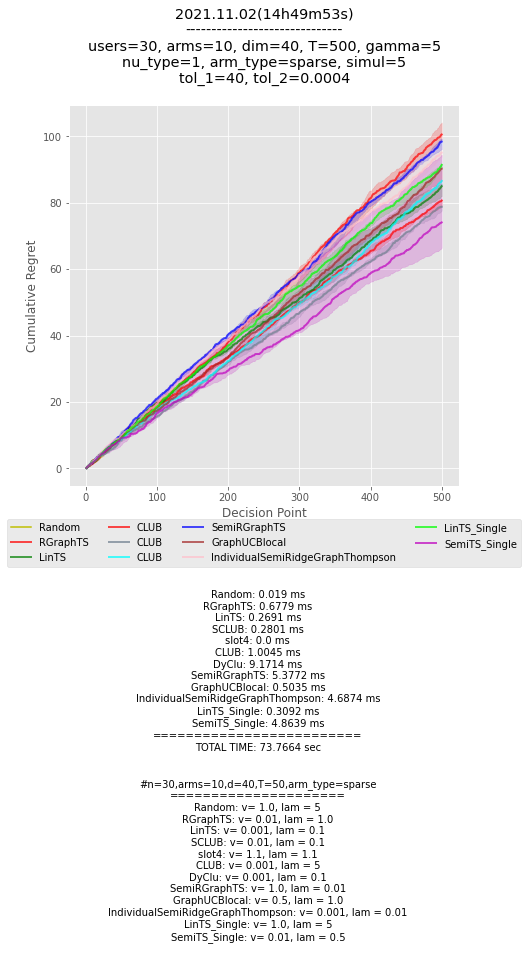


<parameters>
user_num = 30 / arm_num = 10 / dimension = 40
delta = 0.05 / R = 0.1 / gamma (for smooth Theta) = 5
-----
const_tol_1 = 40 / const_tol_2 = 0.0004
graph = ER / laplacian=random_walk / threshold = 0.5 / prob = 0.4 / const_alpha_2 = 0.15
########################################

<mean computing time>
Random: 0.019 ms
RGraphTS: 0.6779 ms
LinTS: 0.2691 ms
SCLUB: 0.2801 ms
slot4: 0.0 ms
CLUB: 1.0045 ms
DyClu: 9.1714 ms
SemiRGraphTS: 5.3772 ms
GraphUCBlocal: 0.5035 ms
IndividualSemiRidgeGraphThompson: 4.6874 ms
LinTS_Single: 0.3092 ms
SemiTS_Single: 4.8639 ms
TOTAL TIME: 73.7664 sec
########################################

<best tuning parameter>
#n=30,arms=10,d=40,T=50,arm_type=sparse
Random: v= 1.0, lam = 5
RGraphTS: v= 0.01, lam = 1.0
LinTS: v= 0.001, lam = 0.1
SCLUB: v= 0.01, lam = 0.1
slot4: v= 1.1, lam = 1.1
CLUB: v= 0.001, lam = 5
DyClu: v= 0.001, lam = 0.1
SemiRGraphTS: v= 1.0, lam = 0.01
GraphUCBlocal: v= 0.5, lam = 1.0
IndividualSemiRidgeGraphThompson: v= 0.001, lam =

In [22]:
NOW = datetime.now().strftime('%Y.%m.%d(%Hh%Mm%Ss)')
IMG_NAME = "arm="+arm_type +"_nu="+ nu_type +"_g="+our_graph_type+"_T="+str(time_horizon) + "_simul"+str(simul_n) +"("+ NOW+ ").png"
IMG_PATH = IMG_FOLDER+"/"+IMG_NAME

if not os.path.exists(IMG_FOLDER_FOR_OS):
    os.makedirs(IMG_FOLDER_FOR_OS)

SAVE = True # False

const_linewidth = 2
const_transparency = 0.7
const_cut_random = 20 # Random
const_cut_semi = 1 # SemiRGraphTS

show_and_save_plot(SAVE, const_linewidth, const_transparency, const_cut_random, const_cut_semi, cumulated_regret_dict, user_num, arm_num,  dimension, time_horizon, const_R, delta, simul_n, epsilon, threshold, prob, gamma, lap_type, our_graph_type, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type, info_computing_time, tuning_info, IMG_PATH, NOW)


In [23]:
print(NOW)

2021.11.02(14h49m53s)


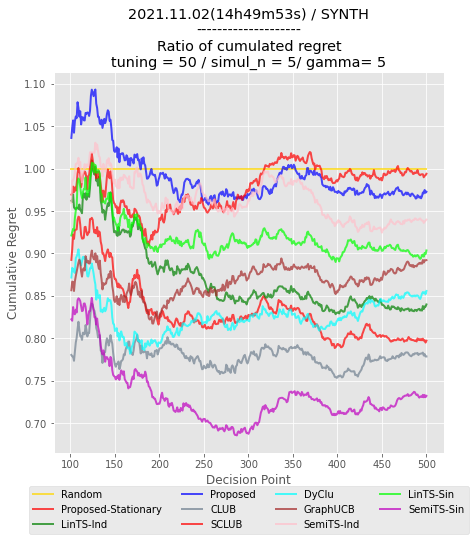

In [27]:
start = 100 # ignore round 1 to "start"
steps=np.arange(start+1,time_horizon+1)

LW = const_linewidth
TP = const_transparency
plt.figure(figsize=(7,7))

colors_dict = {"Random": "gold",
               "RGraphTS" : "r",
               "LinTS" : "g",
               "SemiRGraphTS" : "blue",
               "GraphUCBlocal" : "brown",
               "CLUB" : "slategrey",
               "SCLUB" : "r",
               "DyClu" : "aqua",
               "IndividualSemiRidgeGraphThompson" : "pink",
               "LinTS_Single" : "lime",
               "SemiTS_Single": "m"}

labels_dict = {"Random": "Random",
               "RGraphTS" : "Proposed-Stationary",
               "LinTS" : "LinTS-Ind",
               "SemiRGraphTS" : "Proposed",
               "GraphUCBlocal" : "GraphUCB",
               "CLUB" : "CLUB",
               "SCLUB" : "SCLUB",
               "DyClu" : "DyClu",
               "IndividualSemiRidgeGraphThompson" : "SemiTS-Ind",
               "LinTS_Single" : "LinTS-Sin",
               "SemiTS_Single": "SemiTS-Sin"}

denominator = np.median(cumulated_regret_dict["Random"], axis=0)[start:]

for MODEL in selected_models:
    COLOR = colors_dict[MODEL]
    numerator = np.median(cumulated_regret_dict[MODEL], axis=0)[start:]
    fraction = np.divide(numerator, denominator)
    plt.plot(steps, fraction, COLOR, linewidth = LW, alpha =  TP, label=labels_dict[MODEL])
    
plt.xlabel('Decision Point')
plt.ylabel('Cumulative Regret')
if we_need_tuning == True:
    plt.title(NOW+" / "+ my_data  + "\n--------------------\n"+"Ratio of cumulated regret\n"+"tuning = " + str(tuning_time_horizon)+" / simul_n = " + str(simul_n) +"/ gamma= "+str(gamma))
else:
    plt.title(NOW+" / "+ my_data  + "\n--------------------\n"+"Ratio of cumulated regret\n"+"tuning = " + "NO"+" / simul_n = " + str(simul_n) +"/ gamma= "+str(gamma))
plt.legend(loc='center', bbox_to_anchor=(0.5,-0.15),fancybox=True,ncol=4)

if SAVE == True:
    RATIO_FOLDER = IMG_FOLDER+"/ratio_image_folder"
    RATIO_FOLDER_FOR_OS = current_dir+"/"+ RATIO_FOLDER
    if not os.path.exists(RATIO_FOLDER_FOR_OS):
        os.makedirs(RATIO_FOLDER_FOR_OS)
        
    plt.savefig(RATIO_FOLDER+"/"+ "ratio_" +my_data + "_" + IMG_NAME, bbox_inches='tight')
    
plt.show()

In [25]:
if SAVE == True:
    REGRET_FOLDER = IMG_FOLDER+"/regret_saving_folder/regret_"+NOW
    REGRET_FOLDER_FOR_OS = current_dir+"/"+REGRET_FOLDER
    if not os.path.exists(REGRET_FOLDER_FOR_OS):
        os.makedirs(REGRET_FOLDER_FOR_OS)

    for MODEL in selected_models:
        np.save(REGRET_FOLDER+'/cumulated_regret_'+ MODEL +"_gamma_"+str(gamma)+'.npy', cumulated_regret_dict[MODEL])